# Método y simulaciones de Montecarlo

## Introducción al Método de Montecarlo

### Conceptos básicos y fundamentos probabilísticos

El método de Montecarlo es un conjunto de técnicas estadísticas que utiliza simulaciones aleatorias para resolver problemas que pueden ser difíciles de abordar analíticamente. Se basa en:

1. Aleatoriedad y Probabilidad

Las simulaciones Montecarlo generan muestras aleatorias a partir de distribuciones probabilísticas conocidas. Estas muestras se utilizan para estimar resultados esperados o la probabilidad de ciertos eventos.

2. Fundamento Matemático

+ Ley de los Grandes Números: A medida que aumenta el número de simulaciones, las estimaciones convergen a los valores reales.
+ Propiedades de las Distribuciones: El uso de distribuciones probabilísticas (normal, uniforme, Poisson, etc.) permite modelar diferentes comportamientos de variables aleatorias.

3. Cuándo usar Montecarlo

+ Cuando el problema es demasiado complejo para resolverse analíticamente.
+ Para analizar escenarios futuros bajo incertidumbre.
+ En aplicaciones como series temporales, valoración de opciones financieras, optimización y riesgos.

### Ejemplos Clásicos

Vamos a ilustrar los principios básicos con dos ejemplos: lanzar un dado y calcular el precio de una acción.

#### Ejemplo 1: Simulación del lanzamiento de un dado

Supongamos que queremos estimar la probabilidad de obtener un número par al lanzar un dado justo.

Pasos:

1. Generar un número aleatorio entre 1 y 6 (representando el dado).
2. Repetir el experimento muchas veces (simulaciones).
3. Contar los casos en los que el resultado es par (2, 4, 6).
4. Calcular la proporción de éxitos.

**Implementación en Python:**

In [1]:
import numpy as np

# Número de simulaciones
n_simulaciones = 10000

# Simular lanzamientos
lanzamientos = np.random.randint(1, 7, size=n_simulaciones)

# Calcular proporción de pares
pares = lanzamientos[lanzamientos % 2 == 0]
probabilidad_par = len(pares) / n_simulaciones

print(f"Probabilidad estimada de obtener un número par: {probabilidad_par:.4f}")


Probabilidad estimada de obtener un número par: 0.4989


#### Ejemplo 2: Estimación del precio de una acción

Supongamos que el precio de una acción sigue un movimiento Browniano geométrico, con:

+ Precio inicial $S_0$. 
+ Retorno esperado $\mu$.
+ Volatilidad $\sigma$.
+ Paso de tiempo $\Delta t$. 

**Modelo de Movimiento Browniano:**

$$
S_{t+1} = S_t \cdot e^{(\mu - \frac{\sigma^2}{2}) \Delta t + \sigma \sqrt{\Delta t} \cdot Z}
$$


Donde $ Z \sim N(0,1)$ (distribución normal estándar).

**Implementación en Python:**

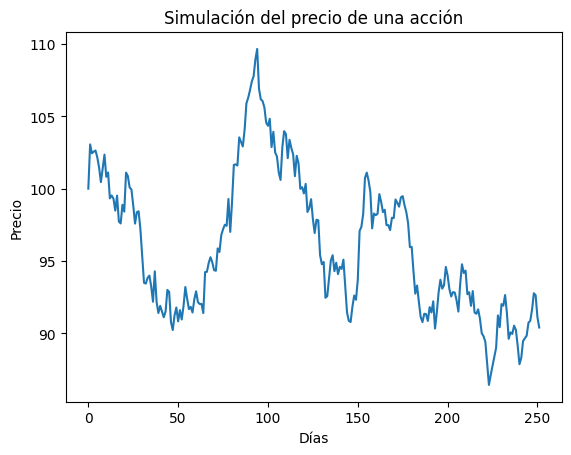

In [2]:
# Parámetros iniciales
S0 = 100  # Precio inicial
mu = 0.05  # Retorno esperado (5%)
sigma = 0.2  # Volatilidad anual (20%)
T = 1  # Tiempo en años
n_steps = 252  # Número de días (252 días hábiles)
dt = T / n_steps  # Paso de tiempo

# Generar ruido aleatorio
Z = np.random.normal(0, 1, n_steps)
S = np.zeros(n_steps)
S[0] = S0

# Simular el precio de la acción
for t in range(1, n_steps):
    S[t] = S[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[t])

# Graficar resultados
import matplotlib.pyplot as plt
plt.plot(S)
plt.title("Simulación del precio de una acción")
plt.xlabel("Días")
plt.ylabel("Precio")
plt.show()


### Conclusión
El método de Montecarlo combina herramientas de probabilidad y simulación para resolver problemas de incertidumbre. Con el ejemplo del dado, vimos cómo estimar probabilidades simples, y con el precio de la acción, cómo modelar fenómenos más complejos.

## Simulaciones de Montecarlo en Series Temporales

### Introducción a series temporales y su modelado

Una serie temporal es una secuencia de valores observados a lo largo del tiempo. Estas son comunes en diversos dominios, como finanzas, clima, energía y más.

Características clave de las series temporales:

+ Autocorrelación: Las observaciones pasadas influyen en las futuras.
+ Estacionalidad: Cambios periódicos (diarios, mensuales, anuales).
+ Tendencia: Crecimiento o decrecimiento a lo largo del tiempo.

#### Modelos comunes:

+ ARIMA (AutoRegressive Integrated Moving Average): Captura la tendencia y autocorrelación en datos estacionarios.
+ GARCH (Generalized Autoregressive Conditional Heteroskedasticity): Modela la volatilidad condicional, útil en datos financieros.

El objetivo de Montecarlo en series temporales es generar posibles trayectorias futuras basadas en un modelo ajustado, proporcionando un rango de escenarios en lugar de una única predicción.

### Generación de simulaciones estocásticas (ARIMA y GARCH)

#### Modelo ARIMA: Este modelo combina:

+ AR (Autoregresivo): Relación lineal con valores pasados.
+ I (Integrado): Diferencias para transformar datos no estacionarios en estacionarios.
+ MA (Media Móvil): Captura el ruido como combinación lineal de errores pasados.

**Simulación de ARIMA:**

1. Ajustar un modelo ARIMA a los datos históricos.
2. Usar el modelo ajustado para generar simulaciones futuras.

**Implementación en Python:**

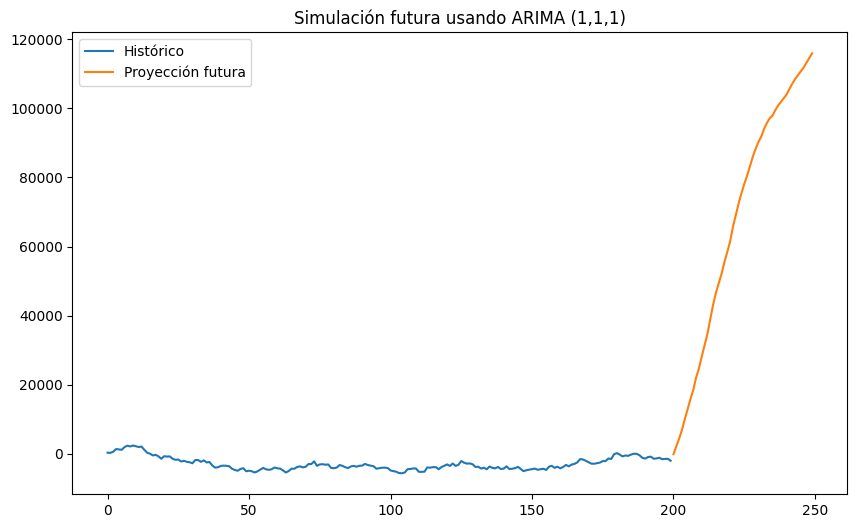

In [3]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Datos simulados: Tendencia con ruido
np.random.seed(42)
n = 200
data = np.cumsum(np.random.normal(10, 500, n))  # Datos con tendencia

# Ajustar un modelo ARIMA (1,1,1)
model = ARIMA(data, order=(1, 1, 1))
fitted_model = model.fit()

# Generar predicciones futuras
n_forecast = 50
simulation = fitted_model.simulate(nsimulations=n_forecast)

# Reconstruir valores acumulados para proyecciones
forecast_cumulative = np.cumsum(simulation) + data[-1]  # Sumar a último punto histórico

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.plot(data, label="Histórico")
plt.plot(range(len(data), len(data) + n_forecast), forecast_cumulative, label="Proyección futura")
plt.title("Simulación futura usando ARIMA (1,1,1)")
plt.legend()
plt.show()



#### Modelo GARCH: El modelo GARCH es ideal para datos financieros donde la volatilidad no es constante (heterocedasticidad).

Pasos para simular un proceso GARCH:

1. Ajustar un modelo GARCH a la volatilidad histórica.
2. Usar el modelo para generar trayectorias futuras.

**Implementación en Python:**

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4488.113750684418
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1441.6532640080381
Iteration:      3,   Func. Count:     22,   Neg. LLF: 1397.4377335583126
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1397.4267922813399
Iteration:      5,   Func. Count:     32,   Neg. LLF: 1511.0981687294732
Iteration:      6,   Func. Count:     38,   Neg. LLF: 1510.3165787045446
Iteration:      7,   Func. Count:     44,   Neg. LLF: 1504.1226252673584
Iteration:      8,   Func. Count:     50,   Neg. LLF: 1417.4101255529754
Iteration:      9,   Func. Count:     56,   Neg. LLF: 1397.7880948636684
Iteration:     10,   Func. Count:     62,   Neg. LLF: 60252.36911013471
Iteration:     11,   Func. Count:     72,   Neg. LLF: 549395697.0008721
Iteration:     12,   Func. Count:     80,   Neg. LLF: 1398.105292657417
Iteration:     13,   Func. Count:     87,   Neg. LLF: 1471.720128879787
Iteration:     14,   Func. Count:     93,   Neg. LLF: 14

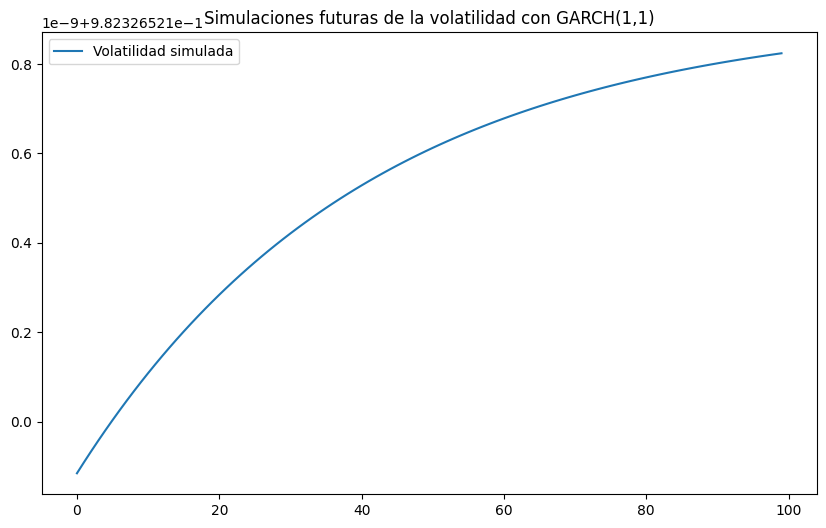

In [4]:
from arch import arch_model
import numpy as np
import matplotlib.pyplot as plt

# Datos simulados de retornos
np.random.seed(42)
returns = np.random.normal(0, 1, 1000)

# Ajustar un modelo GARCH(1, 1)
garch_model = arch_model(returns, vol='Garch', p=1, q=1)
garch_fitted = garch_model.fit()

# Generar simulaciones de volatilidad futura
n_forecast = 100
simulated_paths = garch_fitted.forecast(horizon=n_forecast)

# Acceder a la volatilidad simulada
volatility_simulated = simulated_paths.variance[-1:]  # Última simulación de volatilidad condicional
volatility_simulated = np.sqrt(volatility_simulated.values.T)  # Tomar raíz cuadrada para convertir varianza en desviación estándar

# Visualizar la volatilidad simulada
plt.figure(figsize=(10, 6))
plt.plot(volatility_simulated, label="Volatilidad simulada")
plt.title("Simulaciones futuras de la volatilidad con GARCH(1,1)")
plt.legend()
plt.show()


### Estimación de distribuciones futuras usando Montecarlo

Una vez ajustado un modelo (ARIMA o GARCH), podemos realizar múltiples simulaciones para estimar una distribución de posibles valores futuros. Esto permite evaluar la incertidumbre de las proyecciones.

**Implementación combinada**: Generemos múltiples trayectorias simuladas de un proceso ARIMA.

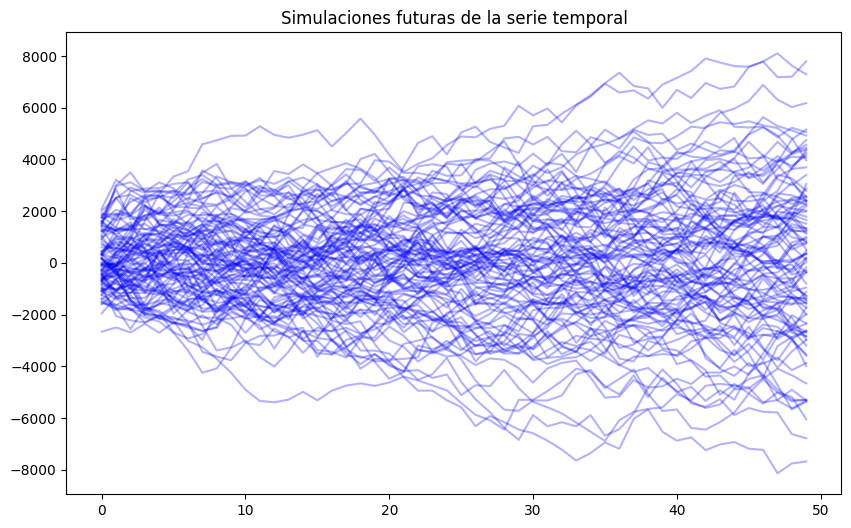

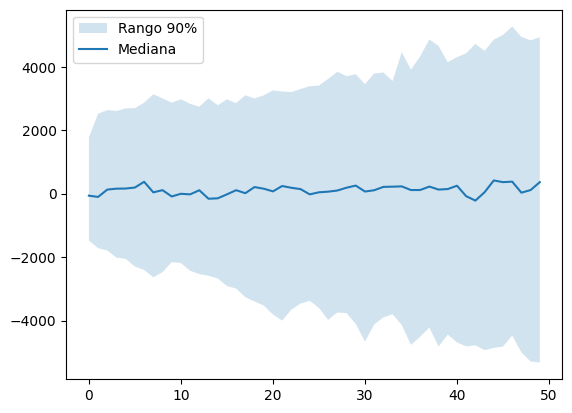

In [5]:
n_simulaciones = 100
n_forecast = 50
simulaciones = []

for _ in range(n_simulaciones):
    simulacion = fitted_model.simulate(nsimulations=n_forecast)
    # simulaciones.append(np.cumsum(simulacion) + data[-1])
    simulaciones.append(simulacion)

# Convertir a DataFrame para análisis
simulaciones_df = pd.DataFrame(simulaciones).T

# Visualizar simulaciones
plt.figure(figsize=(10, 6))
for i in range(n_simulaciones):
    plt.plot(simulaciones_df[i], alpha=0.3, color="blue")
plt.title("Simulaciones futuras de la serie temporal")
plt.show()

# Resumen estadístico
percentiles = simulaciones_df.quantile([0.05, 0.5, 0.95], axis=1).T
plt.fill_between(range(n_forecast), percentiles[0.05], percentiles[0.95], alpha=0.2, label="Rango 90%")
plt.plot(percentiles[0.5], label="Mediana")
plt.legend()
plt.show()


Iteration:      1,   Func. Count:      6,   Neg. LLF: 4488.113750684418
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1441.6532640080381
Iteration:      3,   Func. Count:     22,   Neg. LLF: 1397.4377335583126
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1397.4267922813399
Iteration:      5,   Func. Count:     32,   Neg. LLF: 1511.0981687294732
Iteration:      6,   Func. Count:     38,   Neg. LLF: 1510.3165787045446
Iteration:      7,   Func. Count:     44,   Neg. LLF: 1504.1226252673584
Iteration:      8,   Func. Count:     50,   Neg. LLF: 1417.4101255529754
Iteration:      9,   Func. Count:     56,   Neg. LLF: 1397.7880948636684
Iteration:     10,   Func. Count:     62,   Neg. LLF: 60252.36911013471
Iteration:     11,   Func. Count:     72,   Neg. LLF: 549395697.0008721
Iteration:     12,   Func. Count:     80,   Neg. LLF: 1398.105292657417
Iteration:     13,   Func. Count:     87,   Neg. LLF: 1471.720128879787
Iteration:     14,   Func. Count:     93,   Neg. LLF: 14

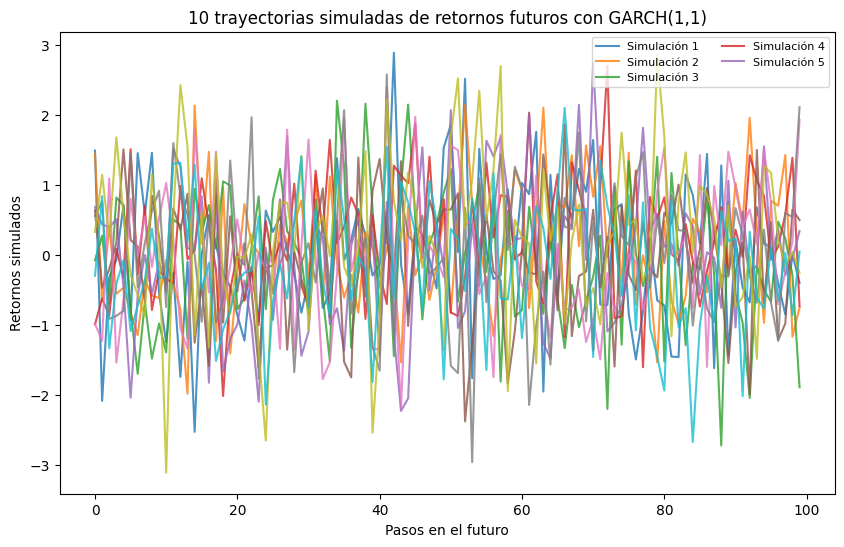

In [6]:
from arch import arch_model
import numpy as np
import matplotlib.pyplot as plt

# Datos simulados de retornos
np.random.seed(42)
returns = np.random.normal(0, 1, 1000)

# Ajustar un modelo GARCH(1, 1)
garch_model = arch_model(returns, vol='Garch', p=1, q=1)
garch_fitted = garch_model.fit()

# Configurar simulaciones
n_forecast = 100  # Horizonte de simulación (n pasos en el futuro)
n_simulations = 10  # Número de trayectorias a simular
simulated_returns = []  # Almacenar trayectorias simuladas

# Simular múltiples trayectorias
for _ in range(n_simulations):
    # Usamos el modelo ajustado para simular
    sim = garch_model.simulate(garch_fitted.params, nobs=n_forecast)
    simulated_returns.append(sim["data"].values.flatten())  # Extraer retornos simulados

# Convertir a matriz para análisis y visualización
simulated_returns = np.array(simulated_returns)

# Visualizar trayectorias simuladas
plt.figure(figsize=(10, 6))
for i in range(n_simulations):
    plt.plot(simulated_returns[i], alpha=0.8, label=f"Simulación {i+1}" if i < 5 else None)  # Mostrar hasta 5 etiquetas
plt.title(f"{n_simulations} trayectorias simuladas de retornos futuros con GARCH(1,1)")
plt.xlabel("Pasos en el futuro")
plt.ylabel("Retornos simulados")
plt.legend(loc="upper right", ncol=2, fontsize=8)
plt.show()


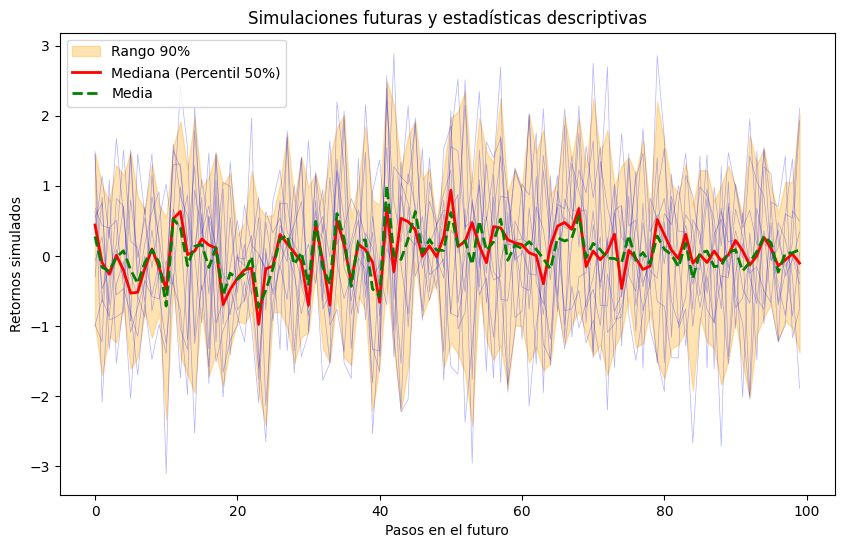

In [7]:
# Calcular estadísticas descriptivas
mean_returns = simulated_returns.mean(axis=0)
percentiles = np.percentile(simulated_returns, [5, 50, 95], axis=0)  # Percentiles 5%, 50% (mediana), 95%

# Visualización de estadísticas
plt.figure(figsize=(10, 6))

# Trayectorias simuladas
for i in range(min(10, n_simulations)):  # Mostrar un subconjunto de trayectorias
    plt.plot(simulated_returns[i], alpha=0.3, color='blue', linewidth=0.5)

# Rango de confianza (90%)
plt.fill_between(range(n_forecast), percentiles[0], percentiles[2], color='orange', alpha=0.3, label="Rango 90%")

# Mediana
plt.plot(percentiles[1], color='red', label="Mediana (Percentil 50%)", linewidth=2)

# Media
plt.plot(mean_returns, color='green', linestyle='--', label="Media", linewidth=2)

plt.title("Simulaciones futuras y estadísticas descriptivas")
plt.xlabel("Pasos en el futuro")
plt.ylabel("Retornos simulados")
plt.legend(loc="upper left")
plt.show()

### Conclusión

Hemos cubierto:

1. Cómo modelar series temporales con ARIMA y GARCH.
2. Cómo generar simulaciones estocásticas.
3. Cómo usar múltiples simulaciones para estimar distribuciones futuras y cuantificar la incertidumbre.

## Determinación del Margin at Risk (MaR)

### Concepto de Margin at Risk (MaR)

El Margin at Risk (MaR) es una métrica financiera que mide el margen adicional que una cuenta necesita mantener para cubrir posibles pérdidas en condiciones adversas. Es especialmente utilizado en operaciones con derivados financieros o trading de futuros.

Se basa en el concepto del **Value at Risk (VaR)**, pero ajustado al margen requerido por una cámara de compensación. El MaR responde a preguntas como:

+ ¿Cuánto margen adicional necesito mantener para cubrir posibles pérdidas futuras?
+ ¿Qué probabilidad existe de que mi margen no sea suficiente?

El cálculo del MaR incorpora:

+ Escenarios futuros: Proyecciones sobre precios, retornos o volatilidades.
+ Nivel de confianza: El porcentaje de confianza para evitar pérdidas que excedan el margen (por ejemplo, 95% o 99%).
+ Riesgo extremo: Cuantifica el peor escenario probable bajo condiciones normales de mercado.

### Cálculo del MaR con simulaciones Montecarlo

**Pasos básicos**

1. Definir el horizonte temporal: Determina el período en el cual deseas evaluar el riesgo (e.g., 1 día, 10 días).
2. Generar simulaciones de escenarios futuros: Utiliza un modelo como GARCH para capturar volatilidad futura o ARIMA para modelar cambios en los precios.
3. Calcular el nivel de pérdidas: Calcula las pérdidas potenciales (o cambios en valor) para cada escenario simulado.
4. Determinar el percentil crítico: Identifica el percentil correspondiente al nivel de confianza deseado (e.g., 5% para un nivel del 95%).

**Código para calcular el MaR**
Supongamos que estamos evaluando el MaR de un portafolio basado en simulaciones Montecarlo de retornos futuros generados por un modelo GARCH.

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4488.113750684418
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1441.6532640080381
Iteration:      3,   Func. Count:     22,   Neg. LLF: 1397.4377335583126
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1397.4267922813399
Iteration:      5,   Func. Count:     32,   Neg. LLF: 1511.0981687294732
Iteration:      6,   Func. Count:     38,   Neg. LLF: 1510.3165787045446
Iteration:      7,   Func. Count:     44,   Neg. LLF: 1504.1226252673584
Iteration:      8,   Func. Count:     50,   Neg. LLF: 1417.4101255529754
Iteration:      9,   Func. Count:     56,   Neg. LLF: 1397.7880948636684
Iteration:     10,   Func. Count:     62,   Neg. LLF: 60252.36911013471
Iteration:     11,   Func. Count:     72,   Neg. LLF: 549395697.0008721
Iteration:     12,   Func. Count:     80,   Neg. LLF: 1398.105292657417
Iteration:     13,   Func. Count:     87,   Neg. LLF: 1471.720128879787
Iteration:     14,   Func. Count:     93,   Neg. LLF: 14

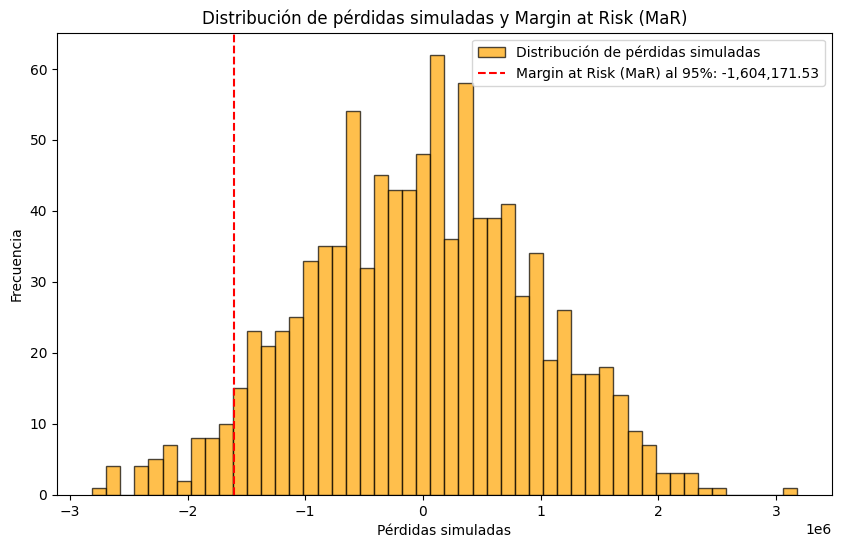

In [8]:
import numpy as np
from arch import arch_model

# Datos simulados de retornos
np.random.seed(42)
returns = np.random.normal(0, 1, 1000)

# Ajustar un modelo GARCH(1, 1)
garch_model = arch_model(returns, vol='Garch', p=1, q=1)
garch_fitted = garch_model.fit()

# Configurar simulaciones
n_forecast = 100  # Horizonte de simulación
n_simulations = 1000  # Número de trayectorias
simulated_returns = []

# Generar múltiples trayectorias
for _ in range(n_simulations):
    sim = garch_model.simulate(garch_fitted.params, nobs=n_forecast)
    simulated_returns.append(sim["data"].values.flatten())

# Convertir simulaciones a una matriz
simulated_returns = np.array(simulated_returns)

# Supongamos que el portafolio inicial tiene un valor de $1,000,000
initial_value = 1_000_000
simulated_losses = -initial_value * simulated_returns  # Pérdidas como cambios negativos

# Calcular el Margin at Risk (MaR)
confidence_level = 0.95  # Nivel de confianza del 95%
MaR = np.percentile(simulated_losses, (1 - confidence_level) * 100, axis=0)  # Percentil crítico

# Visualización del MaR y las pérdidas simuladas
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(simulated_losses[:, -1], bins=50, alpha=0.7, color="orange", edgecolor="black", label="Distribución de pérdidas simuladas")
plt.axvline(MaR[-1], color="red", linestyle="--", label=f"Margin at Risk (MaR) al 95%: {MaR[-1]:,.2f}")
plt.title("Distribución de pérdidas simuladas y Margin at Risk (MaR)")
plt.xlabel("Pérdidas simuladas")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()



### Métodos para proyectar el riesgo basado en escenarios futuros

**Modelos de volatilidad:**

Usar GARCH para capturar la volatilidad condicional de los retornos. Esto es especialmente útil en mercados financieros con clustering de volatilidad.

**Escenarios específicos:**

Simular eventos extremos o cambios estructurales, como un aumento súbito de la volatilidad o caídas drásticas en los precios.

**Horizontes variables:**

Evaluar el MaR para diferentes horizontes temporales (e.g., 1 día, 10 días, 1 mes).

### Análisis de sensibilidades

El análisis de sensibilidades permite evaluar cómo cambia el MaR bajo diferentes configuraciones o condiciones. Por ejemplo:

1. Impacto del nivel de confianza: Evalúa cómo varía el MaR al cambiar el nivel de confianza (e.g., 95%, 99%).



In [9]:
confidence_levels = [0.90, 0.95, 0.99]
MaRs = [np.percentile(simulated_losses, (1 - cl) * 100, axis=0)[-1] for cl in confidence_levels]
for cl, mar in zip(confidence_levels, MaRs):
    print(f"MaR al nivel de confianza {cl * 100:.0f}%: {mar:,.2f}")


MaR al nivel de confianza 90%: -1,293,030.29
MaR al nivel de confianza 95%: -1,604,171.53
MaR al nivel de confianza 99%: -2,305,788.59


2. Impacto de la volatilidad: Simula escenarios donde la volatilidad se duplica o se reduce.

In [10]:
# Aumentar la volatilidad en un 50%
increased_volatility = simulated_returns * 1.5
MaR_increased_vol = np.percentile(-initial_value * increased_volatility, (1 - confidence_level) * 100, axis=0)
print(f"MaR con volatilidad aumentada: {MaR_increased_vol[-1]:,.2f}")

MaR con volatilidad aumentada: -2,406,257.30


3. Impacto del tamaño del portafolio: Evalúa cómo cambia el MaR con diferentes tamaños iniciales.

In [11]:
portfolio_sizes = [500_000, 1_000_000, 2_000_000]
for size in portfolio_sizes:
    MaR = np.percentile(-size * simulated_returns, (1 - confidence_level) * 100, axis=0)
    print(f"MaR para un portafolio de ${size:,.0f}: {MaR[-1]:,.2f}")

MaR para un portafolio de $500,000: -802,085.77
MaR para un portafolio de $1,000,000: -1,604,171.53
MaR para un portafolio de $2,000,000: -3,208,343.06


### Resumen

1. **Cálculo básico del MaR**: Determinamos el valor en riesgo a partir de las simulaciones Montecarlo.
2. **Proyección bajo escenarios futuros**: Incorporamos dinámicas como cambios en volatilidad o horizontes variables.
3. **Análisis de sensibilidad**: Exploramos cómo cambian los resultados bajo diferentes configuraciones.